In [20]:
pip install selenium

In [21]:
pip install wordcloud matplotlib

In [22]:
import pandas as pd



csv_path = '/content/drive/MyDrive/deep learning/Dataset Analisis Sentimen - After Labeling.csv'
df = pd.read_csv(csv_path)


total_tasks = len(df)
max_threads = 1







In [23]:
df

,Unnamed: 0,Komentar,Timestap,Sumber,Label
0,1,Batalkan saja. Rakyat Indonesia sudah muak dg ...,31/10/2024,YouTube,Negative
1,2,punya pacar ngga ada otak ngerendahin ibu gue ...,08/11/2024,X,Negative
2,3,Kalau lu masih nge pertahanin ya lu juga gaada...,08/11/2024,X,Negative
3,4,"Beasiswa tapi beli tas Hermes, naik jet pribad...",31/10/2024,YouTube,Negative
4,5,stop bikin tweet yang membuat gua mikir di nih...,08/11/2024,X,Negative
...,...,...,...,...,...
1015,1016,"minusnya apa sih ni orang,perfect bgt masyaallah",28/11/2024,TikTok,Positive
1016,1017,syukurlah lagunya ceria klo ngga capek bgt mew...,28/11/2024,TikTok,Positive
1017,1018,"pak TIW dah potong rambut , wajah nya makin se...",28/11/2024,TikTok,Positive
1018,1019,klu uda pernh ke nduga berarti keren ...aku aj...,28/11/2024,TikTok,Positive


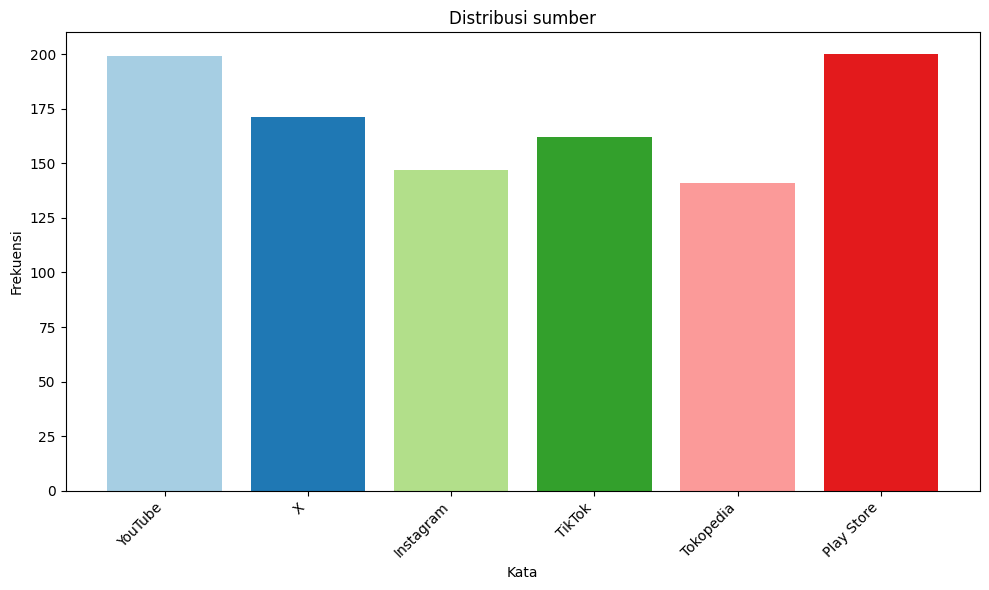

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

list_komen = df['Sumber'].dropna().tolist()


frekuensi_kata = Counter(list_komen)


sumber_data = list(frekuensi_kata.items())

labels = [item[0] for item in sumber_data]
sizes = [item[1] for item in sumber_data]

plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=plt.cm.Paired.colors[:len(labels)])  # Batang dengan warna berbeda
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Distribusi sumber')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu X agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()


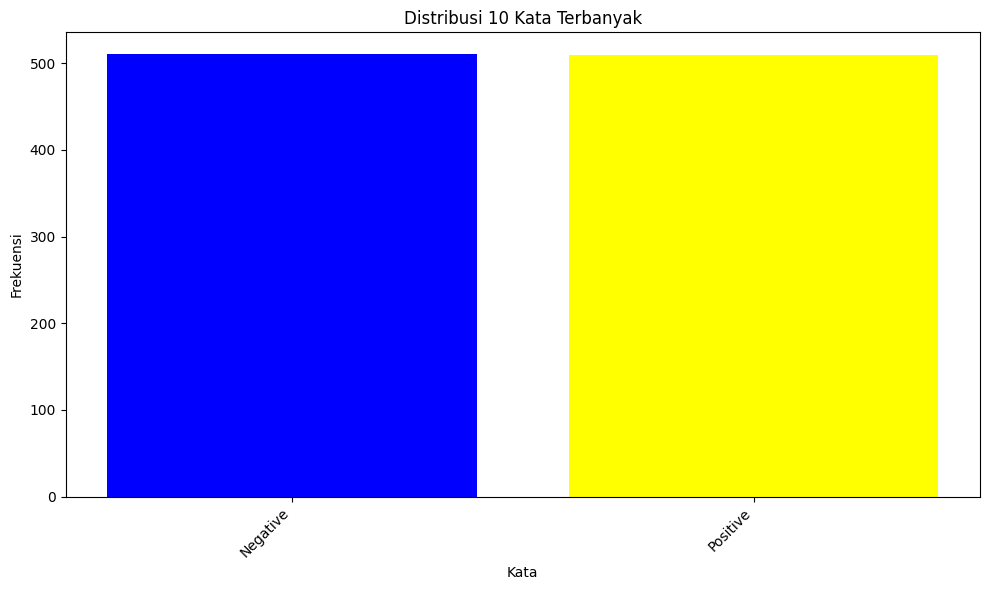

In [25]:
import matplotlib.pyplot as plt
from collections import Counter

colors = ['yellow', 'blue']


# Ambil data dari kolom Label
list_komen = df['Label'].dropna().tolist()

# Hitung frekuensi kata
frekuensi_kata = Counter(list_komen)

# Ambil dua label dengan frekuensi tertinggi
label_data = frekuensi_kata.most_common(2)

# Pisahkan label dan ukuran
labels = [item[0] for item in label_data]
sizes = [item[1] for item in label_data]

# Gunakan warna kuning untuk positif dan biru untuk lainnya
colors = ['yellow' if label.lower() == 'positive' else 'blue' for label in labels]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, sizes, color=colors)
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Distribusi 10 Kata Terbanyak')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [26]:


list_komen = df['Komentar'].dropna().tolist()
semua_kalimat = " ".join(list_komen)

semua_kata = semua_kalimat.lower().split()



In [27]:
kata_umum = [
    # Kata Sambung dan Konjungsi
    "yang", "yg", "dalam", "dlm", "dan", "atau", "tetapi", "melainkan",
    "serta", "namun", "sehingga", "karena", "oleh", "untuk", "agar",
    "supaya", "sebab", "maka", "demi", "jika", "apabila", "bila",
    "walaupun", "meskipun", "sekalipun", "sedangkan", "sementara",
    "lalu", "kemudian", "bahkan", "selain", "seperti", "yakni", "yaitu",
    "hanya", "walau", "tanpa", "dengan", "hingga", "sampai", "sebab",
    "sebelum", "sesudah", "ketika", "saat", "pada", "sewaktu",
    "di", "ke", "pada", "dari", "oleh", "untuk", "bahwa", "oleh karena",
    "tapi", "soalnya", "biar", "so", "dan sebagainya", "asalkan",

    # Kata Ganti
    "saya", "aku", "anda", "kamu", "kau", "dia", "ia", "kita",
    "kami", "mereka", "nya", "mu", "ku", "kami", "kalian", "dirinya",
    "sendiri", "milik", "masing-masing", "seseorang", "siapa", "sesuatu",

    # Bahasa Gaul dan Umum
    "banget", "bgt", "kok", "dong", "nih", "deh", "aja", "gitu", "gue",
    "gua", "loh", "lagi", "kalo", "enggak", "gak", "ga", "udah", "sih",
    "yah", "buat", "jadi", "doang", "gimana", "gini", "kenapa", "sama sekali",
    "kayak", "contohnya", "contoh", "sama", "beda", "berbeda", "mirip",
    "klo", "gaes", "bro", "sis", "drpd", "jd", "emang", "soalnya", "tsb",
    "malah", "loh", "gitu", "kok", "dong", "sekali", "banget", "nih",

    # Singkatan Umum
    "pd", "dgn", "ttg", "utk", "dr", "dll", "sbg", "dlm", "tsb", "yg",
    "tsb", "dst", "tp", "gak", "ga", "enggak", "aja", "dg", "tsb", "dll", "ya", "tak", "ngak",

    # Kata Tanya
    "apa", "siapa", "dimana", "kapan", "mengapa", "bagaimana",
    "dmn", "knp", "apa", "gimana", "kenapa", "berapa", "siapa", "mana", "org","udh",

    # Preposisi dan Kata Umum Lainnya
    "adalah", "itu", "ini", "tersebut", "terhadap", "sekitar", "antara",
    "selama", "sejak", "sebagai", "oleh", "tanpa", "pada", "di", "ke",
    "dari", "bahwa", "jadi", "juga", "lagi", "tersebut", "akan", "sekitar",
    "dimana", "bagaimana", "oleh", "maupun", "sedikit", "banyak",
    "lebih", "kurang", "paling", "hampir", "begitu", "setelah", "maka",
    "apalagi", "meski", "meskipun", "walau", "walaupun", "walau begitu",
    "dalam hal", "kira-kira", "justru", "malahan", "bahkan", "di mana",
    "betul-betul", "tentu", "tadi", "sudah", "belum", "telah", "akan",
    "masih", "sedang", "kemungkinan", "harus", "perlu", "bukan", "tidak",
    "sangat", "cukup", "dengan", "sekali", "apabila", "kalau", "bagi",
    "demikian", "tersebut", "sesudah", "sebelum", "seperti", "untuk",
    "supaya", "setelah", "hingga", "mengingat", "terhadap", "sehingga",
    "agar", "maka", "karena",

    # Kata Benda Umum
    "orang", "hewan", "benda", "tempat", "waktu", "kondisi", "keadaan",
    "hal", "peristiwa", "kejadian", "masalah", "perkara", "tugas",
    "pekerjaan", "hasil", "tujuan", "cara", "jalan", "metode", "proses",
    "usaha", "sistem", "alat", "kegiatan", "aktivitas", "kasus", "informasi",
    "data", "fakta", "contoh", "fungsi", "komponen", "satuan", "unsur",
    "bagian", "elemen", "aspek", "peran", "pelaku", "peserta", "pengguna",
    "pembeli", "penjual", "pihak", "sumber", "produk", "hasil", "item",

    # Kata Sifat dan Keterangan Umum
    "besar", "kecil", "tinggi", "rendah", "cepat", "lambat", "panjang",
    "pendek", "baik", "buruk", "benar", "salah", "mudah", "sulit", "penting",
    "utama", "khusus", "umum", "lengkap", "minimal", "maksimal", "optimal",
    "biasa", "luar biasa", "sempurna", "terakhir", "awal", "lama", "baru",
    "lama", "muda", "tua", "sederhana", "kompleks", "mampu", "tepat",
    "jelas", "pasti", "tentu", "mungkin", "ada", "bisa", "terjadi", "terlihat",
    "tampak", "nyata", "jelas", "selalu", "kadang", "sering", "jarang",

    # Kata Kerja Umum
    "punya", "mau", "pergi", "datang", "tinggal", "makan", "minum", "tahu",
    "lihat", "dengar", "bicara", "berbicara", "bilang", "ngomong", "menyebut",
    "pikir", "memikirkan", "percaya", "ingat", "bertemu", "mencari", "memilih",
    "melakukan", "mencoba", "menonton", "bermain", "memakai", "menggunakan",
    "bekerja", "belajar", "mengerti", "paham", "kenal", "melihat", "mendengar",
    "mengambil", "membawa", "mengajukan", "menghadapi", "menghubungi", "mendapatkan",
    "menyediakan", "menunjukkan", "menghasilkan", "mengeluarkan", "menjalani",
    "memang", "bikin", "menjalankan", "berjalan", "memulai", "menyelesaikan",
    "menambah", "mengurangi", "mengatur", "mengendalikan", "memperoleh",
    "memperbaiki", "meningkatkan", "dapat","di", "ke", "pada", "dari", "oleh", "untuk", "bahwa", "oleh karena",
    "tapi", "soalnya", "biar", "so", "dan sebagainya", "asalkan","tolong",
    "tanpa", "dengan", "hingga", "sampai", "sebab",
    "sebelum", "sesudah", "ketika", "saat", "pada", "sewaktu",

    "padahal", "suka", "pas", "perbaiki", "pake"
]

for i in semua_kata:
    if i in kata_umum:
        semua_kata.remove(i)

[('bagus', 163), ('aplikasi', 107), ('di', 107), ('bahasa', 105), ('bisa', 103), ('filter', 78), ('lu', 70), ('duolingo', 62), ('ada', 62), ('keren', 54)]


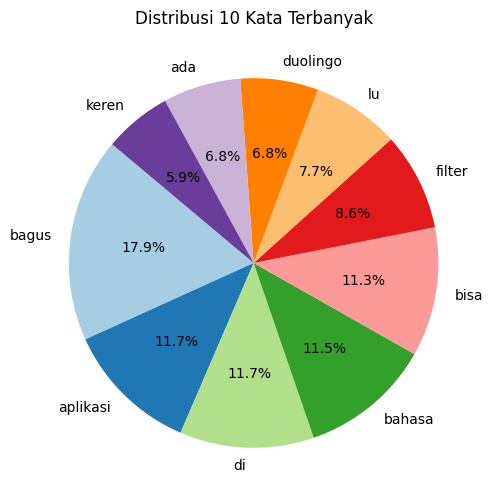

In [28]:

frekuensi_kata = Counter(semua_kata)

top_10_kata = frekuensi_kata.most_common(10)
print(top_10_kata)

# Siapkan data untuk pie chart
labels = [item[0] for item in top_10_kata]   # Nama kategori (kata)
sizes = [item[1] for item in top_10_kata]    # Frekuensi tiap kata

# Membuat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribusi 10 Kata Terbanyak')
plt.show()

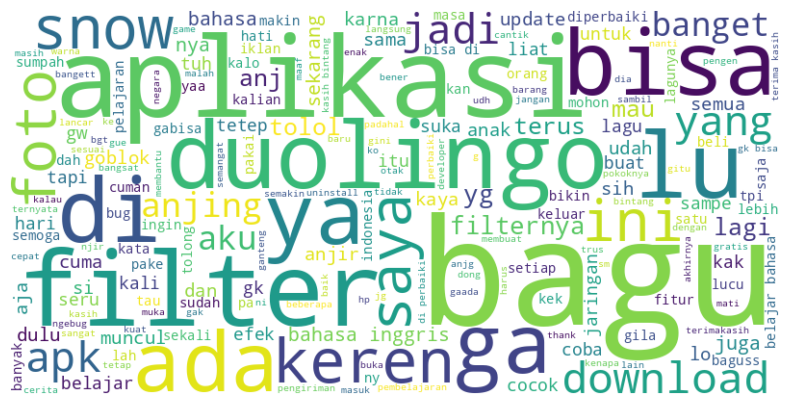

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Masukkan teks yang ingin Anda gunakan untuk *word cloud*
text =  " ".join(semua_kata)

# Membuat *word cloud*
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan *word cloud*
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
